# Confusion matrix

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [14, 10]

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from rbm.train.kfold_elements import KFoldElements
import pandas as pd

In [9]:
#!pip install seaborn
import seaborn as sns
#from mlxtend.plotting import plot_confusion_matrix

In [3]:
def split_x_y(data, y_column):
    n_samples, n_columns = data.shape

    columns = [f'plugin{i}' for i in range(1, n_columns + 1)]
    train_columns = columns[0:y_column] + columns[y_column + 1:n_columns + 1]
    test_column = f'plugin{y_column + 1}'

    return data[train_columns], data[test_column]

In [82]:
data = pd.read_csv('../data/pedalboard-plugin.csv', sep=",", index_col=['id', 'name'])

kfolds = KFoldElements(data=data, n_splits=5, random_state=42, shuffle=False)
model = KNeighborsClassifier(n_neighbors=1)

for index, train, test in kfolds.split():
    for column in range(1, 7):
        column = 2
        X, y = split_x_y(train, column)
        
        model.fit(X, y)
        break
    break


In [83]:
X_test, y_test = split_x_y(test, column)

y_predict = model.predict(X_test)

Text(185.45375000000013, 0.5, 'predict')

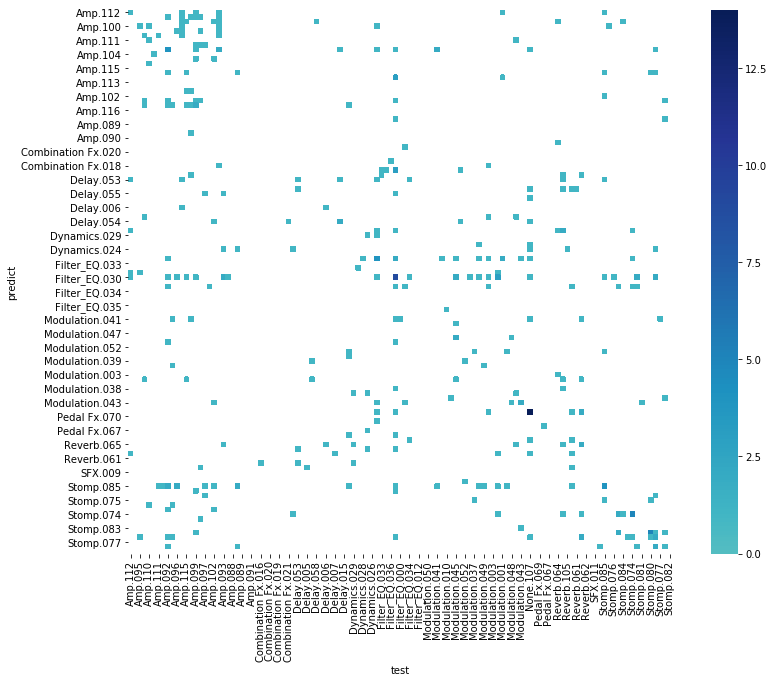

In [106]:
categories = pd.read_csv('../data/plugins_categories_simplified.csv').sort_values(['category', 'name'])
categories['new_id'] = categories.category + '.' + categories.id.astype(str).str.rjust(3, '0')

new_columns_order = categories.id
new_columns_names = categories.new_id

matrix = confusion_matrix(y_test, y_predict, labels=range(117))
matrix = pd.DataFrame(matrix)
matrix = matrix[new_columns_order]
matrix = matrix.reindex(new_columns_order)
matrix.columns = new_columns_names
matrix.index = new_columns_names

mask = matrix == 0

ax = sns.heatmap(data=matrix, cmap="YlGnBu", center=1, mask=mask, square=True)
ax.set_xlabel('test')
ax.set_ylabel('predict')

In [85]:
len(y_hat), (y_hat == y_test).sum()

(380, 24)